## Welcome to NERDSS on Google Colab!

Upon running, Google Colab will ask you for access to Google Drive. Once mounted, you can access your Google Drive files under the /content/drive/My Drive directory.

# 1. Mount Google Drive and Install NERDSS

In [ ]:
'''
Author: Yue Moon Ying

Note, currently using Public version of NERDSS
Be careful that ioNERDSS and NERDSS will be installed and complied in YOUR google drive which takes around 200 MB of space
Remember to reduce the iteration number to accomadate computational power on Google colab
Be aware there is some latency between uploading files to Google Drive and sync to Mount
'''

# Mount Google Drive
# Accessing Google Drive from a Google Colab notebook

from google.colab import drive
drive.mount('/content/drive/')

# Navigate to Your Drive Files
# Google Colab will ask you for access to Google Drive
# Once mounted, you can access your Google Drive files under the /content/drive/My Drive directory.

# Change to the desired directory
import os
os.chdir('/content/drive/My Drive')

# Pull NERDSS from Github
!git clone https://github.com/mjohn218/NERDSS.git

# List files in NERDSS folder
os.chdir('/content/drive/My Drive/NERDSS')
!ls

# Verify current working directory
print(os.getcwd())

In [ ]:
# Check C++ compiler
!g++ --version

# Install Dependency: GSL
!sudo apt install libgsl-dev -y

# 2. Compile and Run Simulation

In [ ]:
# Compile
# Under free Google Colab this takes est. 12 minutes
!make serial -j8

In [ ]:
# cd into sample input directory
# currently using unimolecular_reverse
os.chdir('/content/drive/My Drive/NERDSS/sample_inputs/VALIDATE_SUITE/unimolecular_reverse')
!ls
!chmod +x ../../../bin/nerdss

In [ ]:
!../../../bin/nerdss -f ./uni_reverse.inp

## Import PDB file

In [4]:
import sys
import os
# Go two levels up from docs/source/ to reach the project root
sys.path.insert(0, os.path.abspath('../../'))

In [5]:
pwd()

'/Users/jonathanfischer/Desktop/ThesisStuff/ionerdss/docs/source'

In [7]:
from ionerdss.model_setup.protein_model import ProteinModel

print('Imports successful!')

Imports successful!


In [8]:
# Load PDB file from id 
pdb_id = '7uhy'
model = ProteinModel(pdb_id)
print('ProteinModel created!')

Successfully downloaded assembly file: 7uhy-assembly1.cif.gz
homologous chains identify finished using the CIF file header: chain ID to molecular type mapping:
{'A': 'A', 'B': 'A', 'A-2': 'A', 'B-2': 'A', 'C': 'B', 'C-2': 'B', 'D': 'C', 'D-2': 'C', 'E': 'D', 'F': 'D', 'G': 'D', 'E-2': 'D', 'F-2': 'D', 'G-2': 'D', 'H': 'E', 'H-2': 'E'}
homogolous chains groups:
[['A', 'B', 'A-2', 'B-2'], ['C', 'C-2'], ['D', 'D-2'], ['E', 'F', 'G', 'E-2', 'F-2', 'G-2'], ['H', 'H-2']]
ProteinModel created!


In [9]:
model.verbose = False  # set to True for print interfaces
model.detect_interfaces(cutoff=0.35, residue_cutoff=3)
print('Interfaces detected!')

Interfaces detected!


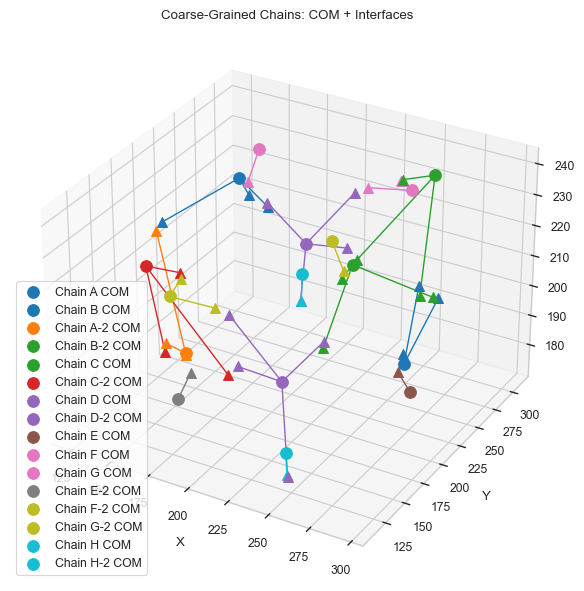

In [10]:
model.plot_original_coarse_grained_structure()

After regularization:


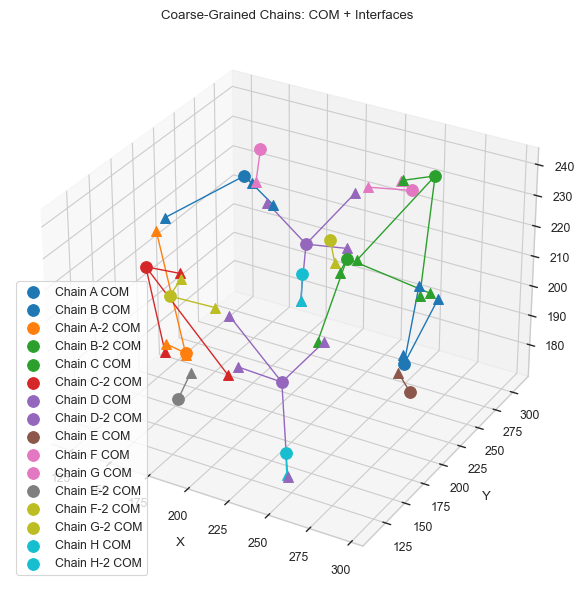

In [11]:
model.regularize_molecules()

print('After regularization:')
model.plot_regularized_structure()

In [ ]:
# Here we would call a soon to be written method that generates the NERDSS input file from the ProteinModel object